In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns; sns.set()

In [2]:
hom_exps = ["hom_relieff", "hom_geode", "hom_gr", "hom_su", "hom_wx"]
sin_exps = ["sin_relieff", "sin_geode", "sin_gr", "sin_su", "sin_wx"]

exps = ["hyb3", "hyb_stbw_borda", "hyb_borda_borda", "het"] + hom_exps + sin_exps

exp_translation = {
    "het": "Heterogeneous",
    "hyb3": "Hybrid Wx-GR-SU",
    "hyb_stbw_borda": "Hybrid Stb",
    "hyb_borda_borda": "Hybrid Borda",
    "hom_geode": "Homogeneous GeoDE",
    "hom_gr": "Homogeneous Gain Ratio",
    "hom_su": "Homogeneous Symmetrical\nUncertainty",
    "hom_relieff": "Homogeneous ReliefF",
    "hom_wx": "Homogeneous Wx",
    "sin_relieff": "ReliefF",
    "sin_geode": "GeoDE",
    "sin_gr": "Gain Ratio",
    "sin_su": "Symmetrical\nUncertainty",
    "sin_wx": "Wx"
}

In [30]:
def save_plot(y_col, df, title):
    save_path = path + "plots/boxplots/"
    style.use('fivethirtyeight')
    sns.set_palette("hls", 8)
    p = sns.boxplot(x="Type", y=y_col, data=df, 
                     hue="Type", dodge=False, linewidth=0.5)
    
    p.set(xticklabels=[])
    p.set(xlabel=None)

    plt.title(title)
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            
    p.get_legend().get_texts()[1].get_fontproperties().set_size(13)
            
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(save_path+title+"_"+y_col, bbox_inches = "tight")
    
    return

# Liver

In [4]:
path = "/home/colombelli/Documents/arrayexpress/liver/"
results = {}

def add_experiment(experiment):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    df['Type'] = [exp_translation[experiment] for i in range(len(df))]
    results[experiment] = df
    return

for e in exps:
    add_experiment(e)
    
renamed_cols= {
    'th_int': 'Threshold',
    'stabilities': 'Stability',
    'mean_ACC': 'Accuracy',
    'mean_ROC_AUC': 'ROC AUC'
}

concat_df = pd.concat(list(results.values()))
concat_df = concat_df.rename(columns=renamed_cols, index={'ONE': 'one'})
concat_df['Trade-off'] = concat_df['Stability'] + 2*concat_df['Accuracy']

concat_df = concat_df[concat_df.Threshold != 150]
concat_df = concat_df[concat_df.Threshold != 200]
concat_df = concat_df[concat_df.Threshold != 500]

hy_he = concat_df.loc[concat_df['Type'].isin(['Heterogeneous', 'Hybrid Wx-GR-SU', 'Hybrid Stb', 'Hybrid Borda'])]

hy_hom_items = [
    "Hybrid Wx-GR-SU", "Hybrid Stb", "Hybrid Borda", "Homogeneous GeoDE", "Homogeneous Gain Ratio", 
    "Homogeneous Symmetrical\nUncertainty", "Homogeneous ReliefF", 
    "Homogeneous Wx"
]

hy_hom = concat_df.loc[concat_df['Type'].isin(hy_hom_items)]

hy_sin_items = [
    "Hybrid Wx-GR-SU", "Hybrid Stb", "Hybrid Borda", "GeoDE", "Gain Ratio", 
    "Symmetrical\nUncertainty", "ReliefF", 
    "Wx"
]

hy_sin = concat_df.loc[concat_df['Type'].isin(hy_sin_items)]

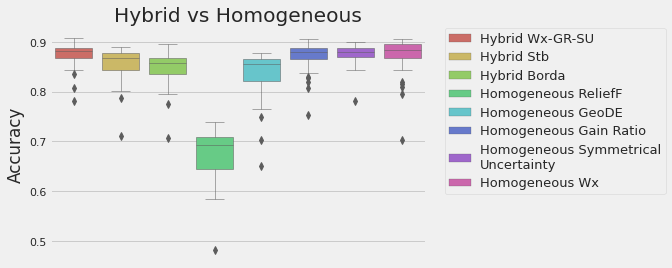

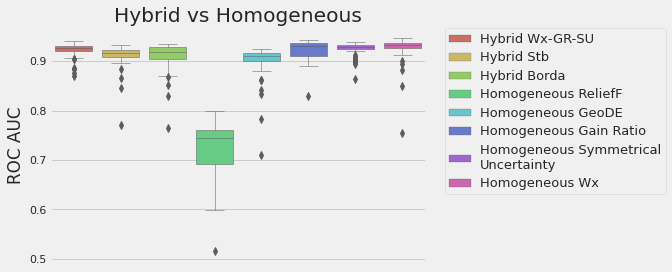

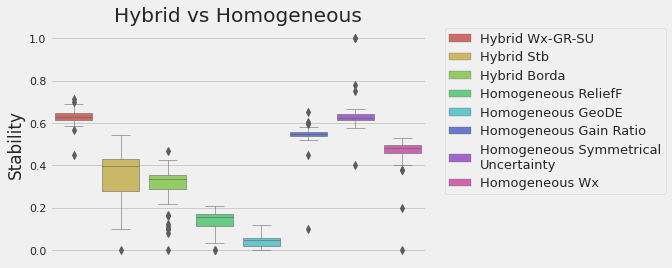

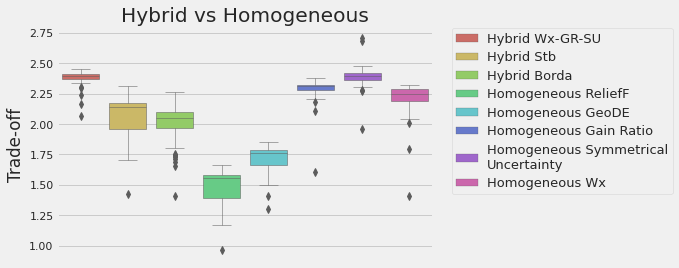

<Figure size 432x288 with 0 Axes>

In [31]:
save_plot("Accuracy", hy_hom, "Hybrid vs Homogeneous")
save_plot("ROC AUC", hy_hom, "Hybrid vs Homogeneous")
save_plot("Stability", hy_hom, "Hybrid vs Homogeneous")
save_plot("Trade-off", hy_hom, "Hybrid vs Homogeneous")